# Plotting and Visualization

Many problems encountered in EE involve processing large amounts of data.  One of the first steps here would be to visualize this data to understand what it looks like and what can be done with it.

In [21]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n
# plt.plot(t, y, t, yn)

<ErrorbarContainer object of 3 artists>

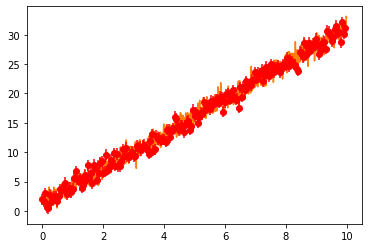

In [23]:
# Get errorbars from noise 
plt.plot(t, y, t, yn)
plt.errorbar(t[::5], yn[::5], np.std(n), fmt='ro')

# Least Squares Curve Fitting

Assume we know something about the function that underlies the observed data (for example, that it is linear or a polynomial function).  However, we don't know the coefficients of the various terms.  For example, say our function takes two parameters $p_1$ and $p_2$, and is a linear function of the time variable $t$: $g(t, p_1, p_2) = p_1 t + p_2$.  

We have a number of *observations* $g_1, g_2, \ldots, g_n$ of this function at different time instants $t_1, t_2, \ldots, t_n$.  These observations can then be written as:

$$
\mathbf{g} \equiv
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_n
\end{pmatrix}
=
\begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_n & 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

## Mean Square Error
We can therefore define an error $\varepsilon = \mathbf{Mp}-\mathbf{g}$ (note that this is itself a vector of point-wise errors), and a *mean-square error* or MSE as:

$$
E = \varepsilon^T \varepsilon = \sum_{1}^{N} \varepsilon_i = \sum_1^N ((p_1 t_i + p_2) - g_i)^2
$$

The goal of *least squares fitting* is to find the parameters $p_i$ such that this MSE $E$ is minimized.  More details of how this works can be seen at [LibreTexts](https://math.libretexts.org/Bookshelves/Linear_Algebra/Interactive_Linear_Algebra_(Margalit_and_Rabinoff)/06%3A_Orthogonality/6.5%3A_The_Method_of_Least_Squares).

In our case, we can use the `lstsq` function from the `numpy.linalg` library.  For this, we have to construct the $\mathbf{M}$ matrix.

In [24]:
# Use column_stack to put the vectors side by side
M = np.column_stack([t, np.ones(len(t))])
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

The estimated equation is 2.9913368969156715 t + 1.172999679072824


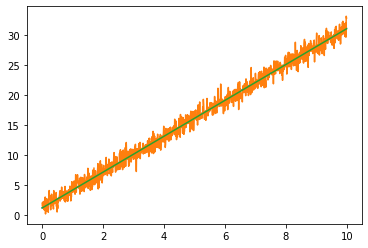

In [25]:
# Plot against the original input and compare
yest = stline(t, p1, p2)
plt.plot(t, y, t, yn, t, yest)

# Non-linear curve fitting

What if your equation was not a linear function of the parameters?  For example:
$$g(t; p_1, p_2) = e^{-p_1 t} + p_2$$

The problem here is that we cannot create the $M$ matrix as a linear combination of $p_1$ and $p_2$!  We still have a notion of MSE:

$$E = \sum_1^N (g(t; p_1, p_2) - z_t)^2$$
where $z_t$ are the observed values.  However, the least squares minimization techniques discussed earlier do not work.  

## `curve_fit`

The `scipy.optimize` library contains the `curve_fit` function that can perform a non-linear curve fitting on observed data.  Unlike the least squares method, here we need to feed in a parametrized function that can be used to estimate the parameters.  

<ErrorbarContainer object of 3 artists>

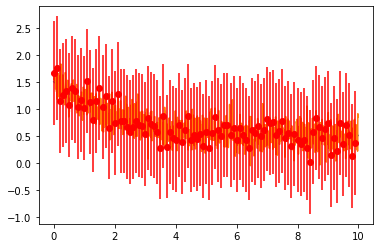

In [26]:
# Create a function with nonlinear dependence on parameters
def nlfunc(t, p1, p2):
    return np.exp(-p1 * t) + p2
z = nlfunc(t, 0.5, 0.5)
# Reuse the same noise - we are lazy
zn = z + 0.2*n
plt.plot(t, z, t, zn)
plt.errorbar(t[::10], zn[::10], np.std(n), fmt='ro')

In [8]:
# Set up the non-linear curve fit
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit(nlfunc, t, zn)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

Estimated function: exp(-0.5183240600519327t) + 0.5087796922295711


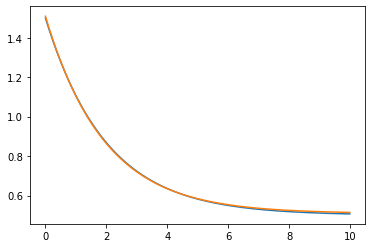

In [9]:
zest = nlfunc(t, zp1, zp2)
plt.plot(t, z, t, zest)

Estimated: 5.011843337371157 * sin(2*pi*0.4992628054629511*t)


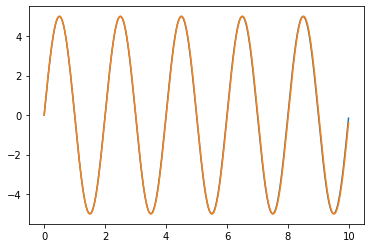

In [10]:
# Non-linear sinusoidal function
def sinfunc(t, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * t)
s = sinfunc(t, 5, 0.5)
sn = s + 0.2*n
# Fit with only first K points
K = 100
(sp1, sp2), _ = curve_fit(sinfunc, t[:K], sn[:K])
print(f"Estimated: {sp1} * sin(2*pi*{sp2}*t)")
# Regenerate data
sest = sinfunc(t, sp1, sp2)
plt.plot(t, s, t, sest)

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

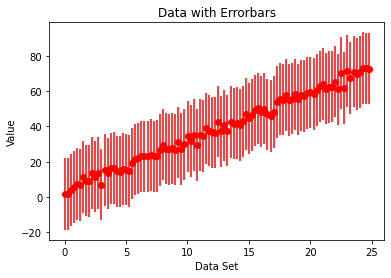

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset1.txt")

data_x = data[:,0]
data_y = data[:,1]
#Plot the data along with errorbars
plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')

# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset1 with Errorbars")

# Show the plot
plt.show()


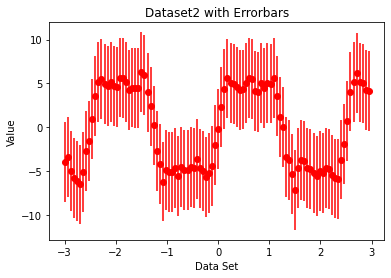

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset2.txt")

data_x = data[:,0]
data_y = data[:,1]
#Plot the data along with errorbars
plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')

# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset2 with Errorbars")

# Show the plot
plt.show()

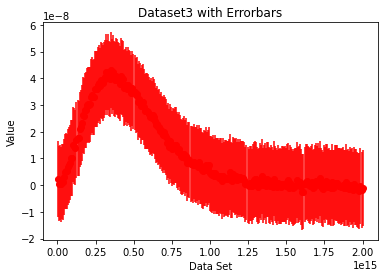

In [15]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset3.txt")

data_x = data[:,0]
data_y = data[:,1]
#Plot the data along with errorbars
plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')

# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset3 with Errorbars")

# Show the plot
plt.show()

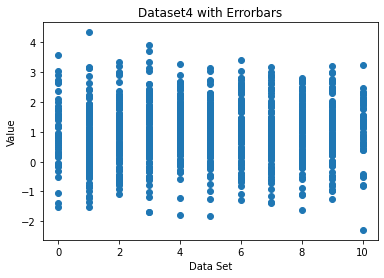

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset4.txt")

data_x = data[:,0]
data_y = data[:,1]
#Plot the data along with errorbars
#plt.errorbar(data_x[::10] , data_y[::10], yerr=np.std(data_y), fmt='ro')
plt.scatter(data_x,data_y)
# Add labels and title to the plot
plt.xlabel("Data Set")
plt.ylabel("Value")
plt.title("Dataset4 with Errorbars")

# Show the plot
plt.show()